In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, ifft, fftfreq
import cmath
from scipy.io import wavfile
from scipy import signal
from scipy.io.wavfile import write
import math

# Kreiranje filtra


In [ ]:
M=4
f=2000
w=2*np.pi*f
r=0.04075 #u metrima
c=340
teta_d=67.5*np.pi/180 #3*np.pi/8 #radijani

psi_0=3*np.pi/4
psi_1=np.pi/4
psi_2=7*np.pi/4
psi_3=5*np.pi/4

In [ ]:
#steering vector
br0=np.cos(w*(r/c)*np.cos(teta_d-psi_0)) + np.sin(w*(r/c)*np.cos(teta_d-psi_0))*1j
br1=np.cos(w*(r/c)*np.cos(teta_d-psi_1)) + np.sin(w*(r/c)*np.cos(teta_d-psi_1))*1j
br2=np.cos(w*(r/c)*np.cos(teta_d-psi_2)) + np.sin(w*(r/c)*np.cos(teta_d-psi_2))*1j
br3=np.cos(w*(r/c)*np.cos(teta_d-psi_3)) + np.sin(w*(r/c)*np.cos(teta_d-psi_3))*1j

d = np.array([[br0],
              [br1],
              [br2],
              [br3]])

print(d)
print(cmath.polar(br0))
print(cmath.polar(br1))
print(cmath.polar(br2))
print(cmath.polar(br3))

[[0.83844874+0.54498047j]
 [0.17836656+0.98396411j]
 [0.83844874-0.54498047j]
 [0.17836656-0.98396411j]]
(1.0, 0.5763658233596968)
(1.0, 1.3914701876433153)
(1.0, -0.5763658233596975)
(1.0, -1.3914701876433153)


In [ ]:
#matrica G
br5=np.sinc((np.sqrt(2)*r*w)/c)
br6=np.sinc((2*r*w)/c)

#br5=np.sinc((2*r*w)/c)
#br6=0

G=np.array([[1,br5,br6,br5],
            [br5,1,br5,br6],
            [br6,br5,1,br5],
            [br5,br6,br5,1]])


In [ ]:
#beamforming filtar
G_inv=np.linalg.inv(G)
d_H=np.transpose(np.conjugate(d))
num1=G_inv.dot(d)
num2=d_H.dot(G_inv)
num3=num2.dot(d)

h_mdf=num1/num3

print(h_mdf)

h_mdf_H=np.transpose(np.conjugate(h_mdf))


[[0.20972833+0.13607656j]
 [0.04623951+0.2456867j ]
 [0.20972833-0.13607656j]
 [0.04623951-0.2456867j ]]


# Karakteristika usmerenosti

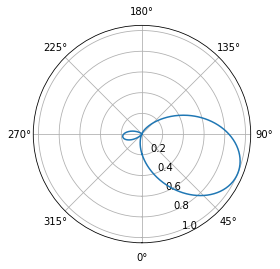

In [ ]:
teta=np.arange(0,2*np.pi,0.01)

br0_teta=np.cos(w*(r/c)*np.cos(teta-psi_0)) + np.sin(w*(r/c)*np.cos(teta-psi_0))*1j
br1_teta=np.cos(w*(r/c)*np.cos(teta-psi_1)) + np.sin(w*(r/c)*np.cos(teta-psi_1))*1j
br2_teta=np.cos(w*(r/c)*np.cos(teta-psi_2)) + np.sin(w*(r/c)*np.cos(teta-psi_2))*1j
br3_teta=np.cos(w*(r/c)*np.cos(teta-psi_3)) + np.sin(w*(r/c)*np.cos(teta-psi_3))*1j

d_teta = np.array([br0_teta,br1_teta,br2_teta,br3_teta])
d_teta_H=np.transpose(np.conjugate(d_teta))


B=np.abs(h_mdf_H.dot(d_teta))**2

ax = plt.subplot(111, polar=True)
ax.set_theta_zero_location('S')
ax.set_theta_direction('counterclockwise')
plt.plot(teta,B[0])   

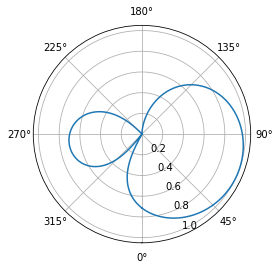

In [ ]:
#karakteristika usmerenosti u dB
minimalno=-50
B_dB=20*np.log10(B)
B_dB[B_dB<minimalno]=minimalno
B_dB=(B_dB+np.abs(minimalno))/np.abs(minimalno) 

ax = plt.subplot(111, polar=True)
ax.set_theta_zero_location('S')
ax.set_theta_direction('counterclockwise')
plt.plot(teta,B_dB[0])   


# Testiranje na signalima

In [ ]:
frekv_odabiranja,s0_00=wavfile.read('F2000D050P00C0A000.wav')
frekv_odabiranja,s1_00=wavfile.read('F2000D050P00C1A000.wav')
frekv_odabiranja,s2_00=wavfile.read('F2000D050P00C2A000.wav')
frekv_odabiranja,s3_00=wavfile.read('F2000D050P00C3A000.wav')

frekv_odabiranja,s0_105=wavfile.read('F2000D050P00C0A105.wav')
frekv_odabiranja,s1_105=wavfile.read('F2000D050P00C1A105.wav')
frekv_odabiranja,s2_105=wavfile.read('F2000D050P00C2A105.wav')
frekv_odabiranja,s3_105=wavfile.read('F2000D050P00C3A105.wav')

frekv_odabiranja,s0_195=wavfile.read('F2000D050P00C0A195.wav')
frekv_odabiranja,s1_195=wavfile.read('F2000D050P00C1A195.wav')
frekv_odabiranja,s2_195=wavfile.read('F2000D050P00C2A195.wav')
frekv_odabiranja,s3_195=wavfile.read('F2000D050P00C3A195.wav')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_laun

In [ ]:
s0_00=s0_00/32768.0
s1_00=s1_00/32768.0
s2_00=s2_00/32768.0
s3_00=s3_00/32768.0

s0_105=s0_105/32768.0
s1_105=s1_105/32768.0
s2_105=s2_105/32768.0
s3_105=s3_105/32768.0

s0_195=s0_195/32768.0
s1_195=s1_195/32768.0
s2_195=s2_195/32768.0
s3_195=s3_195/32768.0

(640000,)


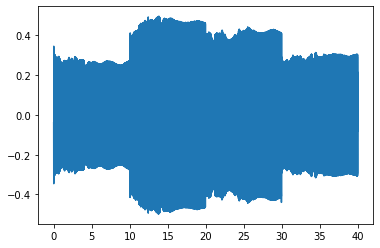

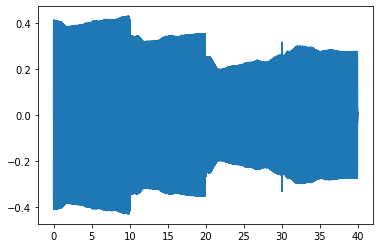

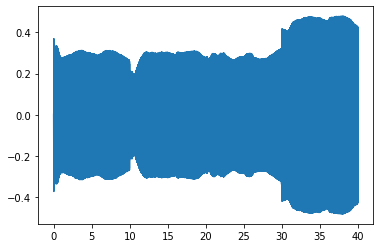

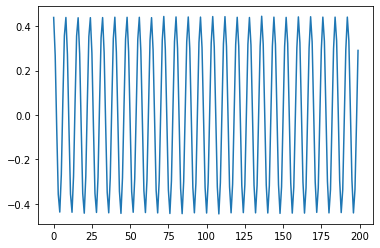

In [ ]:
time=np.arange(0,40,1/frekv_odabiranja)

s_0=np.concatenate((s0_00,s1_00,s2_00,s3_00))
plt.figure()
plt.plot(time, s_0)

s_105=np.concatenate((s0_105,s1_105,s2_105,s3_105))
plt.figure()
plt.plot(time, s_105)

s_195=np.concatenate((s0_195,s1_195,s2_195,s3_195))
plt.figure()
plt.plot(time, s_195)

plt.figure()
print(s_195.shape)
plt.plot(s_195[630000:630200])

In [ ]:
#hilbertova transf za sve te signale
s0_00_Ht=signal.hilbert(s0_00, N=s0_00.shape[0], axis=0)
s1_00_Ht=signal.hilbert(s1_00, N=s1_00.shape[0], axis=0)
s2_00_Ht=signal.hilbert(s2_00, N=s2_00.shape[0], axis=0)
s3_00_Ht=signal.hilbert(s3_00, N=s3_00.shape[0], axis=0)

s0_105_Ht=signal.hilbert(s0_105, N=s0_105.shape[0], axis=0)
s1_105_Ht=signal.hilbert(s1_105, N=s1_105.shape[0], axis=0)
s2_105_Ht=signal.hilbert(s2_105, N=s2_105.shape[0], axis=0)
s3_105_Ht=signal.hilbert(s3_105, N=s3_105.shape[0], axis=0)

s0_195_Ht=signal.hilbert(s0_195, N=s0_195.shape[0], axis=0)
s1_195_Ht=signal.hilbert(s1_195, N=s1_195.shape[0], axis=0)
s2_195_Ht=signal.hilbert(s2_195, N=s2_195.shape[0], axis=0)
s3_195_Ht=signal.hilbert(s3_195, N=s3_195.shape[0], axis=0)

In [ ]:
#sad ih treba konkatenirati po kanalima-to je kao sta su snimili mikrofoni ako je signal emitovan iz 3 ugla uzastopno
s0=np.concatenate((s0_00_Ht,s0_105_Ht,s0_195_Ht))
s1=np.concatenate((s1_00_Ht,s1_105_Ht,s1_195_Ht))
s2=np.concatenate((s2_00_Ht,s2_105_Ht,s2_195_Ht))
s3=np.concatenate((s3_00_Ht,s3_105_Ht,s3_195_Ht))

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


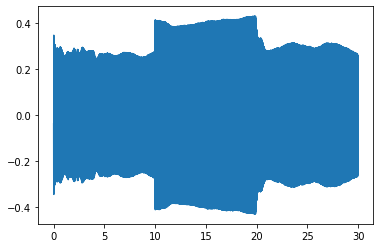

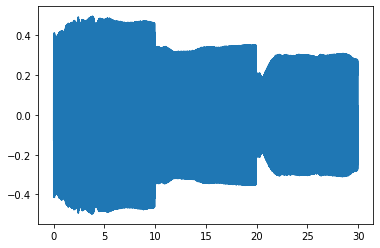

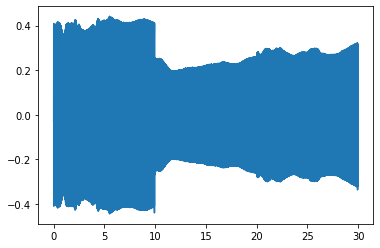

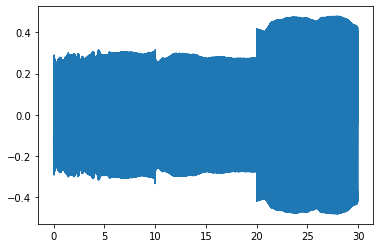

In [ ]:
time=np.arange(0,30,1/frekv_odabiranja)
plt.figure()
plt.plot(time, s0)

plt.figure()
plt.plot(time, s1)

plt.figure()
plt.plot(time, s2)

plt.figure()
plt.plot(time, s3)

In [ ]:
#sad treba isfiltrirati tj svaki kanal mnoziti sa odgovarajucim koef iz h
s0_h=h_mdf_H[0,0]*s0
s1_h=h_mdf_H[0,1]*s1
s2_h=h_mdf_H[0,2]*s2
s3_h=h_mdf_H[0,3]*s3


In [ ]:
print(h_mdf_H[0,0])
print(h_mdf_H[0,1])
print(h_mdf_H[0,2])
print(h_mdf_H[0,3])

(0.24421950121275185+0.06461675366033753j)
(-0.007068922659750124-0.24894973432777776j)
(0.2442195012127519-0.06461675366033744j)
(-0.007068922659750185+0.2489497343277777j)


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


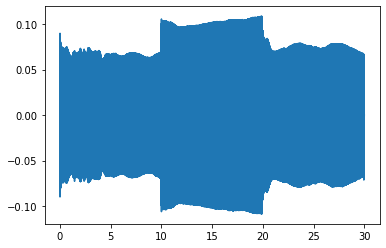

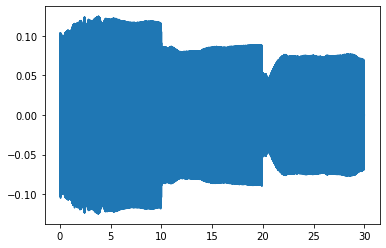

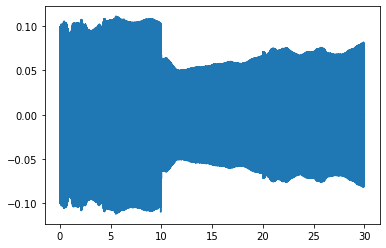

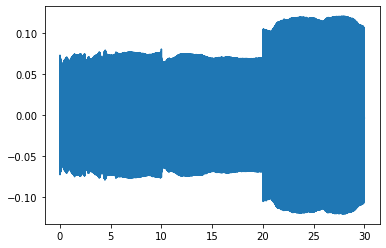

In [ ]:
plt.figure()
plt.plot(time, s0_h)

plt.figure()
plt.plot(time, s1_h)

plt.figure()
plt.plot(time, s2_h)

plt.figure()
plt.plot(time, s3_h)

(480000,)


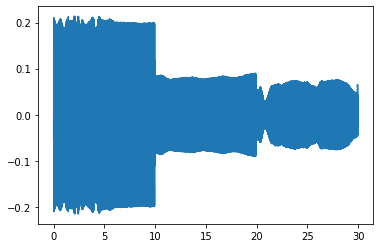

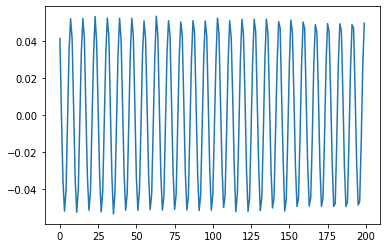

In [ ]:
rez=s0_h+s1_h+s2_h+s3_h
rez=rez.real

time=np.arange(0,30,1/frekv_odabiranja)
plt.figure()
plt.plot(time, rez)

print(rez.shape)
plt.figure()
plt.plot(rez[321000:321200])

rez_00=rez[0:round(rez.shape[0]/3)]
rez_105=rez[round(rez.shape[0]/3):round(2*rez.shape[0]/3)]
rez_195=rez[round(2*rez.shape[0]/3):rez.shape[0]]

'''
plt.figure()
plt.plot(rez_00[0:300])
plt.figure()
plt.plot(rez_105[0:300])
plt.figure()
plt.plot(rez_195[0:300])
'''
write('00.wav',frekv_odabiranja,rez_00)
write('105.wav',frekv_odabiranja,rez_105)
write('195.wav',frekv_odabiranja,rez_195)

# Slucaj 15 stepeni

In [ ]:
fi=np.pi/12
phi=np.pi/2-fi

In [ ]:
#d_15
br0_15=np.cos(w*(r/c)*np.cos(teta_d-psi_0)*np.sin(phi)) + np.sin(w*(r/c)*np.cos(teta_d-psi_0)*np.sin(phi))*1j
br1_15=np.cos(w*(r/c)*np.cos(teta_d-psi_1)*np.sin(phi)) + np.sin(w*(r/c)*np.cos(teta_d-psi_1)*np.sin(phi))*1j
br2_15=np.cos(w*(r/c)*np.cos(teta_d-psi_2)*np.sin(phi)) + np.sin(w*(r/c)*np.cos(teta_d-psi_2)*np.sin(phi))*1j
br3_15=np.cos(w*(r/c)*np.cos(teta_d-psi_3)*np.sin(phi)) + np.sin(w*(r/c)*np.cos(teta_d-psi_3)*np.sin(phi))*1j

d_15 = np.array([[br0_15],
                 [br1_15],
                 [br2_15],
                 [br3_15]])

#G_15
br5_15=np.sinc(np.sqrt(2)*r*w/c)*np.sin(phi)
br6_15=np.sinc(2*r*w/c)*np.sin(phi)

G_15=np.array([[1,br5_15,br6_15,br5_15],
            [br5_15,1,br5_15,br6_15],
            [br6_15,br5_15,1,br5_15],
            [br5_15,br6_15,br5_15,1]])


#h_mdf_15
G_inv_15=np.linalg.inv(G_15)
d_H_15=np.transpose(np.conjugate(d_15))
num1_15=G_inv_15.dot(d_15)
num2_15=d_H_15.dot(G_inv_15)
num3_15=num2_15.dot(d_15)

h_mdf_15=num1_15/num3_15

h_mdf_H_15=np.transpose(np.conjugate(h_mdf_15))


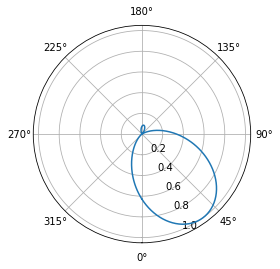

In [ ]:
teta=np.arange(0,2*np.pi,0.01)

br0_teta_15=np.cos(w*(r/c)*np.cos(teta-psi_0)*np.sin(phi)) + np.sin(w*(r/c)*np.cos(teta-psi_0)*np.sin(phi))*1j
br1_teta_15=np.cos(w*(r/c)*np.cos(teta-psi_1)*np.sin(phi)) + np.sin(w*(r/c)*np.cos(teta-psi_1)*np.sin(phi))*1j
br2_teta_15=np.cos(w*(r/c)*np.cos(teta-psi_2)*np.sin(phi)) + np.sin(w*(r/c)*np.cos(teta-psi_2)*np.sin(phi))*1j
br3_teta_15=np.cos(w*(r/c)*np.cos(teta-psi_3)*np.sin(phi)) + np.sin(w*(r/c)*np.cos(teta-psi_3)*np.sin(phi))*1j

d_teta_15 = np.array([br0_teta_15,br1_teta_15,br2_teta_15,br3_teta_15])

d_teta_H_15=np.transpose(np.conjugate(d_teta_15))

B_15=np.abs(h_mdf_H_15.dot(d_teta_15))**2

fig = plt.figure()
ax = plt.subplot(111, polar=True)
ax.set_theta_zero_location('S')
ax.set_theta_direction('counterclockwise')
plt.plot(teta,np.transpose(B_15))

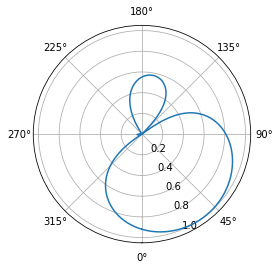

In [ ]:
minimalno=-50
B_dB_15=20*np.log10(B_15)
B_dB_15[B_dB_15<minimalno]=minimalno
B_dB_15=(B_dB_15+np.abs(minimalno))/np.abs(minimalno) 

ax = plt.subplot(111, polar=True)
ax.set_theta_zero_location('S')
ax.set_theta_direction('counterclockwise')
plt.plot(teta,B_dB_15[0])   

# Testiranje na signalima

In [ ]:
frekv_odabiranja,s0_30_15=wavfile.read('F2000D050P15C0A030.wav')
frekv_odabiranja,s1_30_15=wavfile.read('F2000D050P15C1A030.wav')
frekv_odabiranja,s2_30_15=wavfile.read('F2000D050P15C2A030.wav')
frekv_odabiranja,s3_30_15=wavfile.read('F2000D050P15C3A030.wav')

frekv_odabiranja,s0_135_15=wavfile.read('F2000D050P15C0A135.wav')
frekv_odabiranja,s1_135_15=wavfile.read('F2000D050P15C1A135.wav')
frekv_odabiranja,s2_135_15=wavfile.read('F2000D050P15C2A135.wav')
frekv_odabiranja,s3_135_15=wavfile.read('F2000D050P15C3A135.wav')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: WavFileWarning: Chunk (non-data) not understood, skipping it.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: WavFileWarning: Chunk (non-data) not understood, skipping it.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: WavFileWarning: Chunk (non-data) not understood, skipping it.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: WavFileWarning: Chunk (non-data) not understood, skipping it.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_laun

In [ ]:
s0_30_15=s0_30_15/32768.0
s1_30_15=s1_30_15/32768.0
s2_30_15=s2_30_15/32768.0
s3_30_15=s3_30_15/32768.0

s0_135_15=s0_135_15/32768.0
s1_135_15=s1_135_15/32768.0
s2_135_15=s2_135_15/32768.0
s3_135_15=s3_135_15/32768.0


In [ ]:
#hilbertova transf za sve te signale
s0_30_Ht_15=signal.hilbert(s0_30_15, N=s0_30_15.shape[0], axis=0)
s1_30_Ht_15=signal.hilbert(s1_30_15, N=s1_30_15.shape[0], axis=0)
s2_30_Ht_15=signal.hilbert(s2_30_15, N=s2_30_15.shape[0], axis=0)
s3_30_Ht_15=signal.hilbert(s3_30_15, N=s3_30_15.shape[0], axis=0)

s0_135_Ht_15=signal.hilbert(s0_135_15, N=s0_135_15.shape[0], axis=0)
s1_135_Ht_15=signal.hilbert(s1_135_15, N=s1_135_15.shape[0], axis=0)
s2_135_Ht_15=signal.hilbert(s2_135_15, N=s2_135_15.shape[0], axis=0)
s3_135_Ht_15=signal.hilbert(s3_135_15, N=s3_135_15.shape[0], axis=0)


(326400,)


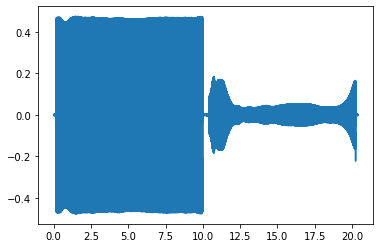

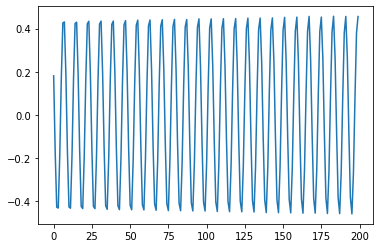

In [ ]:
s0_15=np.concatenate((s0_30_Ht_15,s0_135_Ht_15))
s1_15=np.concatenate((s1_30_Ht_15,s1_135_Ht_15))
s2_15=np.concatenate((s2_30_Ht_15,s2_135_Ht_15))
s3_15=np.concatenate((s3_30_Ht_15,s3_135_Ht_15))

s0_h_15=h_mdf_H_15[0,0]*s0_15
s1_h_15=h_mdf_H_15[0,1]*s1_15
s2_h_15=h_mdf_H_15[0,2]*s2_15
s3_h_15=h_mdf_H_15[0,3]*s3_15

rez_15=s0_h_15+s1_h_15+s2_h_15+s3_h_15
rez_15=rez_15.real

time_15=np.arange(0,20.4,1/frekv_odabiranja)
plt.figure()
plt.plot(time_15, rez_15)

print(rez_15.shape)
plt.figure()
plt.plot(rez_15[81000:81200])


rez_30_15=rez_15[0:round(rez_15.shape[0]/2)]
rez_135_15=rez_15[round(rez_15.shape[0]/2):rez_15.shape[0]]


write('30_15.wav',frekv_odabiranja,rez_30_15)
write('135_15.wav',frekv_odabiranja,rez_135_15)
